## Note :
- instead of filling the same central tendency in all NAN values , we can calculate separate central tendency values for each catagory
- for this method, we need a catagorical column as reference which will determine the batches
### # It is important to make sure that the catagorical column taken as reference is clean itself

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# loading the dataset

In [2]:
df = pd.read_csv('./Datasets/house_prices/train.csv')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# clearing out columns with large missing values

In [5]:
drop_cols = df.isnull().sum()/df.shape[0]*100
df2 = df.drop(drop_cols[drop_cols>25].keys(),axis = 1)

In [6]:
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


# Numerical Value Data Impuation (by classes)

In [7]:
nan_cols = df2.select_dtypes(include=['int64','float64']).isnull().sum()
nan_cols = nan_cols[nan_cols>0].keys()

In [8]:
nan_cols

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

## Note :
- Inorder to choose the catagorical column to govern the class, we must have the domain knowledge so that the catagory is actually related to the numerical column
- Also the catagorical column chosen should be clean itself

In [9]:
# we have taken the refrence catagorical column for: 

# LotFrontage : LotShape
# MasVnrArea : MasVnrType
# GarageYrBlt : GarageType

In [10]:
# to see if the catagorial columns are clean at least in the NAN parts of the numerical columns

df2[df2[['LotFrontage','LotShape']].isnull().any(axis = 1)][['LotFrontage','LotShape']].isnull().sum()

LotFrontage    259
LotShape         0
dtype: int64

In [11]:
# MasVnrType has NAN values in all values of MasVnrArea that contains NAN values
# so we need to change to another catagorical column

df2[df2[['MasVnrArea','MasVnrType']].isnull().any(axis = 1)][['MasVnrArea','MasVnrType']].isnull().sum()

MasVnrArea    8
MasVnrType    8
dtype: int64

In [12]:
# GarageType has NAN values in all values of GarageYrBlt that contains NAN values
# so we need to change to another catagorical column

df2[df2[['GarageYrBlt','GarageType']].isnull().any(axis = 1)][['GarageYrBlt','GarageType']].isnull().sum()

GarageYrBlt    81
GarageType     81
dtype: int64

### Visualizing in different catagorical variables against 'GarageYrBlt' , 'MasVnrArea'

In [13]:
cols = df2.select_dtypes(include=['object']).columns
cols.shape

(38,)

In [14]:
y_cols = [i for i in cols if len(df[i].unique())>3 and len(df[i].unique())<8 and df[i].isnull().sum()==0]

In [15]:
y_cols

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'BldgType',
 'RoofStyle',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'SaleCondition']

In [16]:
len(y_cols)

14

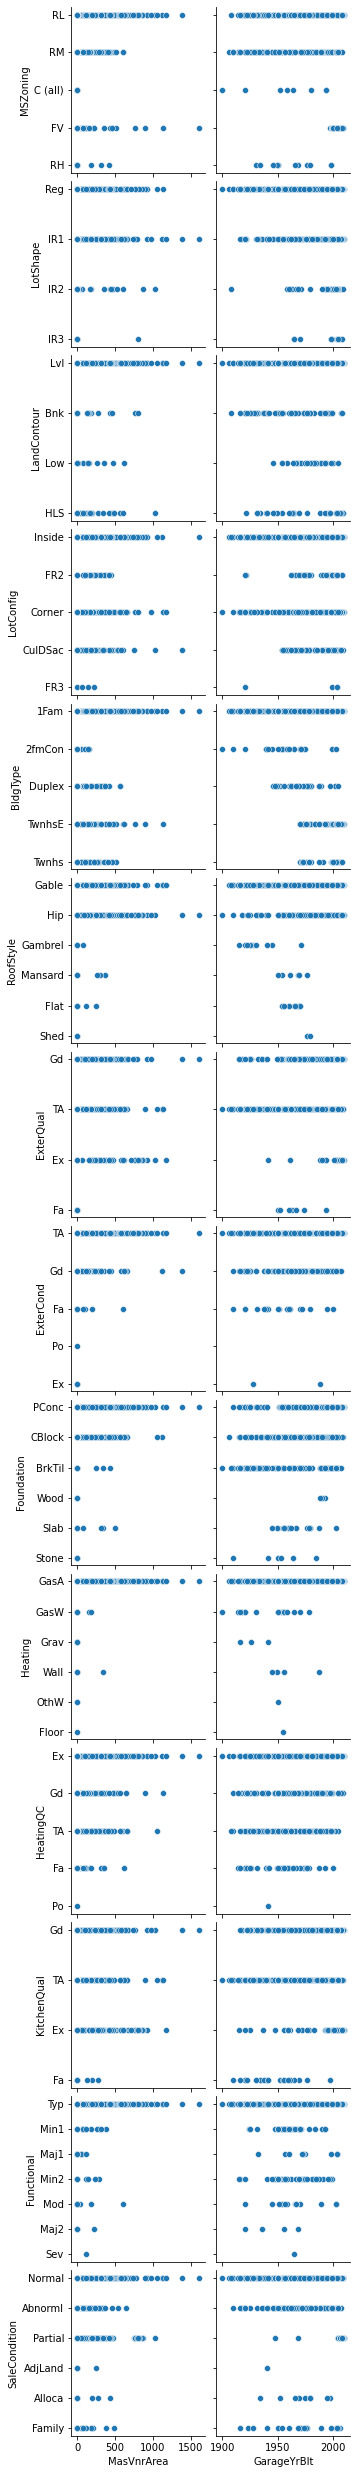

In [17]:
sns.pairplot(df2,x_vars= ['MasVnrArea','GarageYrBlt'],y_vars = y_cols)

In [18]:
# after consideration we chose the catagorical columns for :

# LotFrontage : LotShape
# GarageYrBlt : BldgType
# MasVnrArea : LandContour

In [20]:
df2[df2[['GarageYrBlt','BldgType']].isnull().any(axis = 1)][['GarageYrBlt','BldgType']].isnull().sum()

GarageYrBlt    81
BldgType        0
dtype: int64

In [21]:
df2[df2[['MasVnrArea','LandContour']].isnull().any(axis = 1)][['MasVnrArea','LandContour']].isnull().sum()

MasVnrArea     8
LandContour    0
dtype: int64

In [22]:
num_cols = ['LotFrontage','GarageYrBlt','MasVnrArea']
cat_cols = ['LotShape','BldgType','LandContour']

In [23]:
df3 = df2.copy()

In [24]:
df3['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [122]:
for i in range(3):
    for k in df[cat_cols[i]].unique():
        df3.update(df3[df3.loc[:,cat_cols[i]] == k][num_cols[i]].replace(np.nan,df3[df3.loc[:,cat_cols[i]] == k]
                                                                         [num_cols[i]].mean()))

<AxesSubplot:>

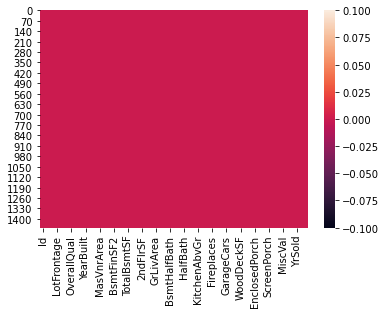

In [123]:
sns.heatmap(df3.select_dtypes(include=['int64','float64']).isnull())

# Visualization of changes in data

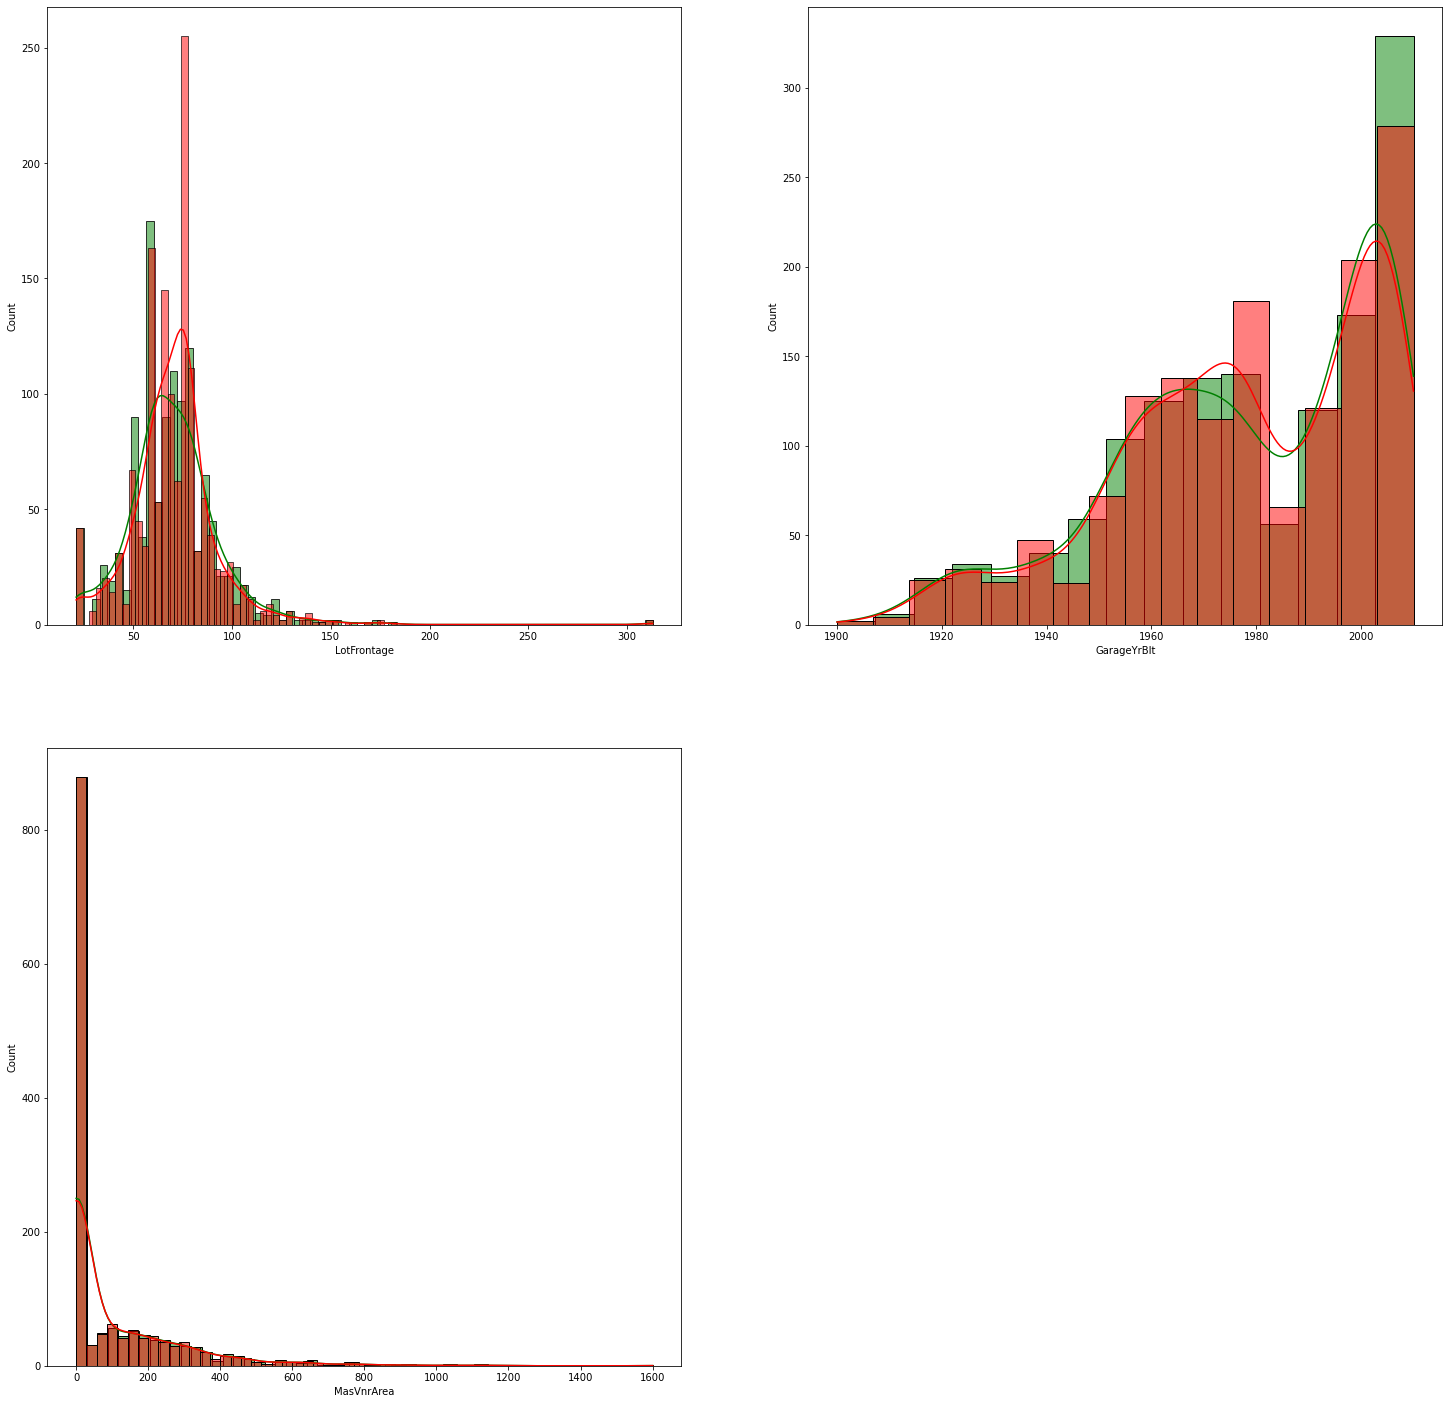

In [146]:
plt.figure(figsize=(25,25))

for i in range(3):
    plt.subplot(2,2,i+1)
    sns.histplot(df2[num_cols[i]],kde=True, color='g')
    sns.histplot(df3[num_cols[i]],kde=True, color='r')    